In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from pylab import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rc('axes', linewidth=3)

In [151]:
#pwd

In [152]:
dataset = pd.read_csv('packet_data_200.csv')

In [153]:
# head
print(dataset.head(20))

    win-size  packet-len  begin-seq  end-seq               label(IP address)
0    507.705     348.425    139.370   19.910   192.5.87.126--129.114.109.142
1    487.795     298.650    139.370   19.910   192.5.87.126--129.114.109.142
2    467.885     318.560    129.415   19.910   192.5.87.126--129.114.109.142
3    457.930     308.605    149.325   19.910   192.5.87.126--129.114.109.142
4    497.750     358.380    139.370   19.910   192.5.87.126--129.114.109.142
5    537.570     388.245    169.235   39.820   192.5.87.126--129.114.109.142
6    457.930     338.470    139.370   29.865   192.5.87.126--129.114.109.142
7    497.750     338.470    149.325   19.910   192.5.87.126--129.114.109.142
8    438.020     288.695    139.370   19.910   192.5.87.126--129.114.109.142
9    487.795     308.605    149.325    9.955   192.5.87.126--129.114.109.142
10   537.570     368.335    149.325   19.910   192.5.87.126--129.114.109.142
11   477.840     338.470    159.280   19.910   192.5.87.126--129.114.109.142

In [154]:
# tail
print(dataset.tail(20))

     win-size  packet-len  begin-seq  end-seq              label(IP address)
180   467.840     298.605    149.280    9.910  192.5.87.157--129.114.109.144
181   527.570     328.470    139.325   29.820  192.5.87.157--129.114.109.144
182   507.660     398.155    139.325    0.045  192.5.87.157--129.114.109.144
183   537.525     408.110    129.370    9.910  192.5.87.157--129.114.109.144
184   477.795     298.605    139.325   20.500  192.5.87.157--129.114.109.144
185   487.750     308.560    109.460    9.910  192.5.87.157--129.114.109.144
186   537.525     338.425    119.415    9.910  192.5.87.157--129.114.109.144
187   477.795     298.605    139.325   30.500  192.5.87.157--129.114.109.144
188   428.020     288.650    119.415    9.910  192.5.87.157--129.114.109.144
189   497.705     328.470    139.325    9.910  192.5.87.157--129.114.109.144
190   487.750     338.425    119.415   19.865  192.5.87.157--129.114.109.144
191   437.975     218.965    119.415   19.865  192.5.87.157--129.114.109.144

In [155]:
# descriptions
print(dataset.describe())

        win-size  packet-len   begin-seq     end-seq
count  200.00000  200.000000  200.000000  200.000000
mean   558.26515  310.435425  314.566750   93.781850
std     83.96217   43.371494  184.084155   79.469558
min    418.06500  199.100000   89.550000    0.045000
25%    495.22750  288.650000  139.370000   19.910000
50%    547.52500  308.560000  243.897500   79.640000
75%    627.16500  338.470000  487.795000  159.280000
max    786.44500  438.020000  686.895000  248.875000


In [156]:
# class distribution
#print(dataset.groupby('class').size())

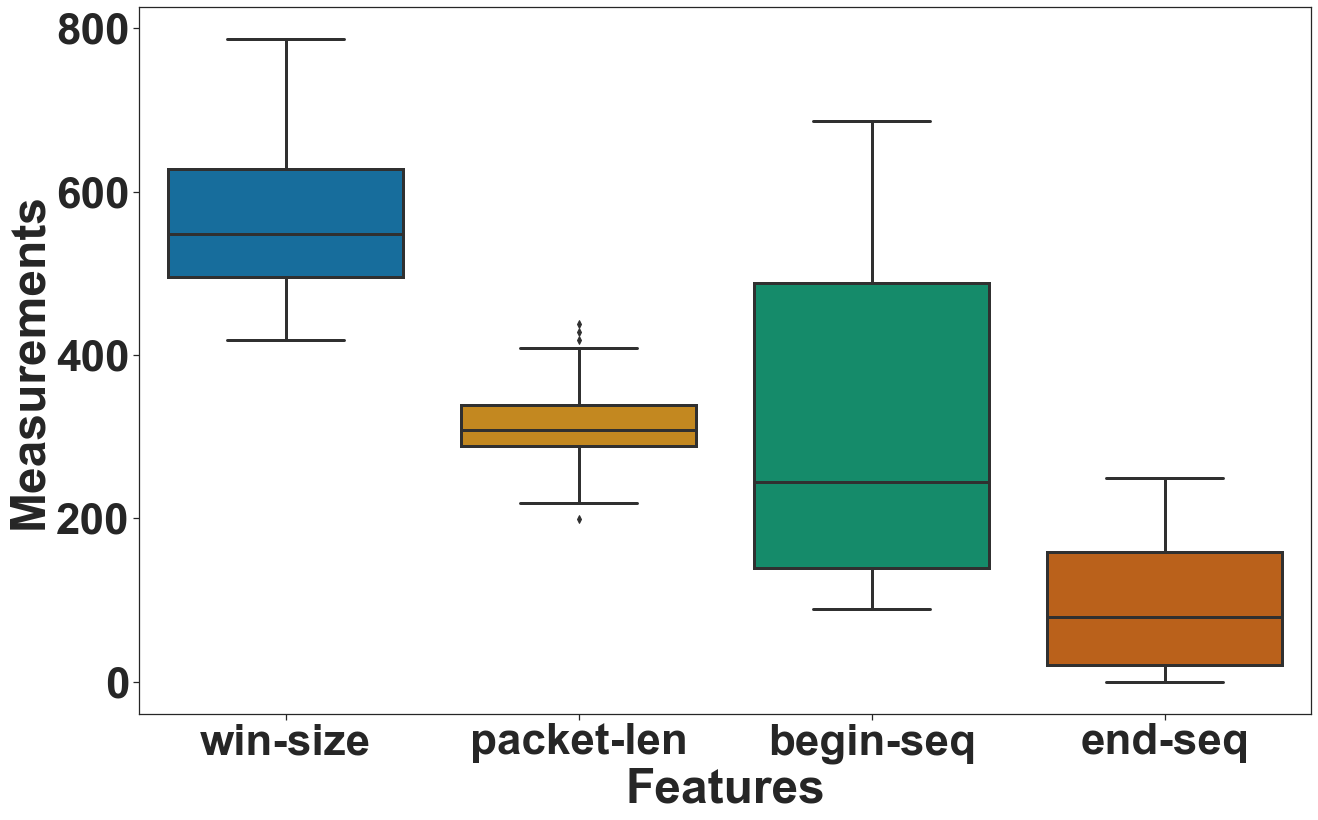

In [157]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 3})
ax = sns.boxplot(data=dataset, palette="colorblind")
# plt.setp(ax.get_legend().get_texts(), fontsize='30') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='30') # for legend title
plt.title('')
plt.xlabel('Features')
plt.ylabel('Measurements')
plt.show()

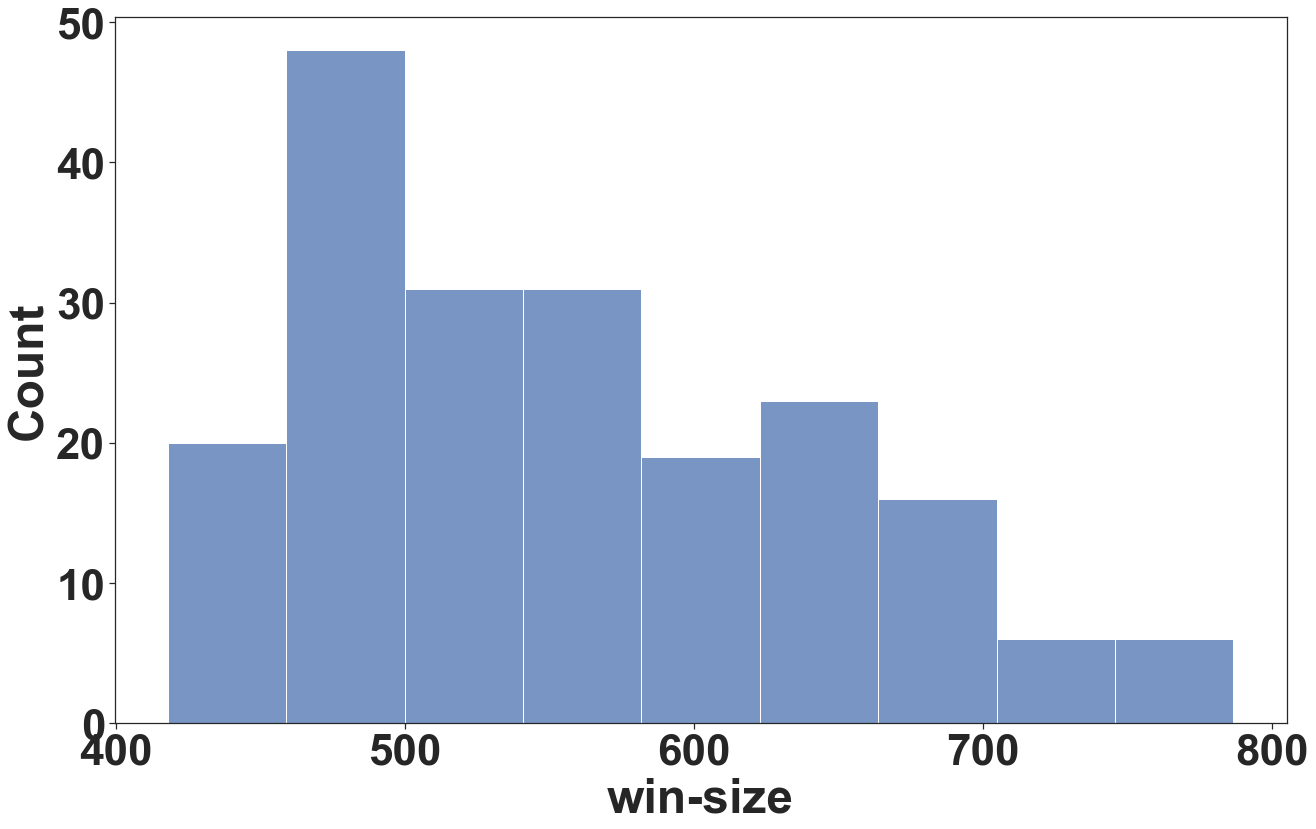

In [158]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 6})
ax = sns.histplot(data= dataset , x = "win-size")

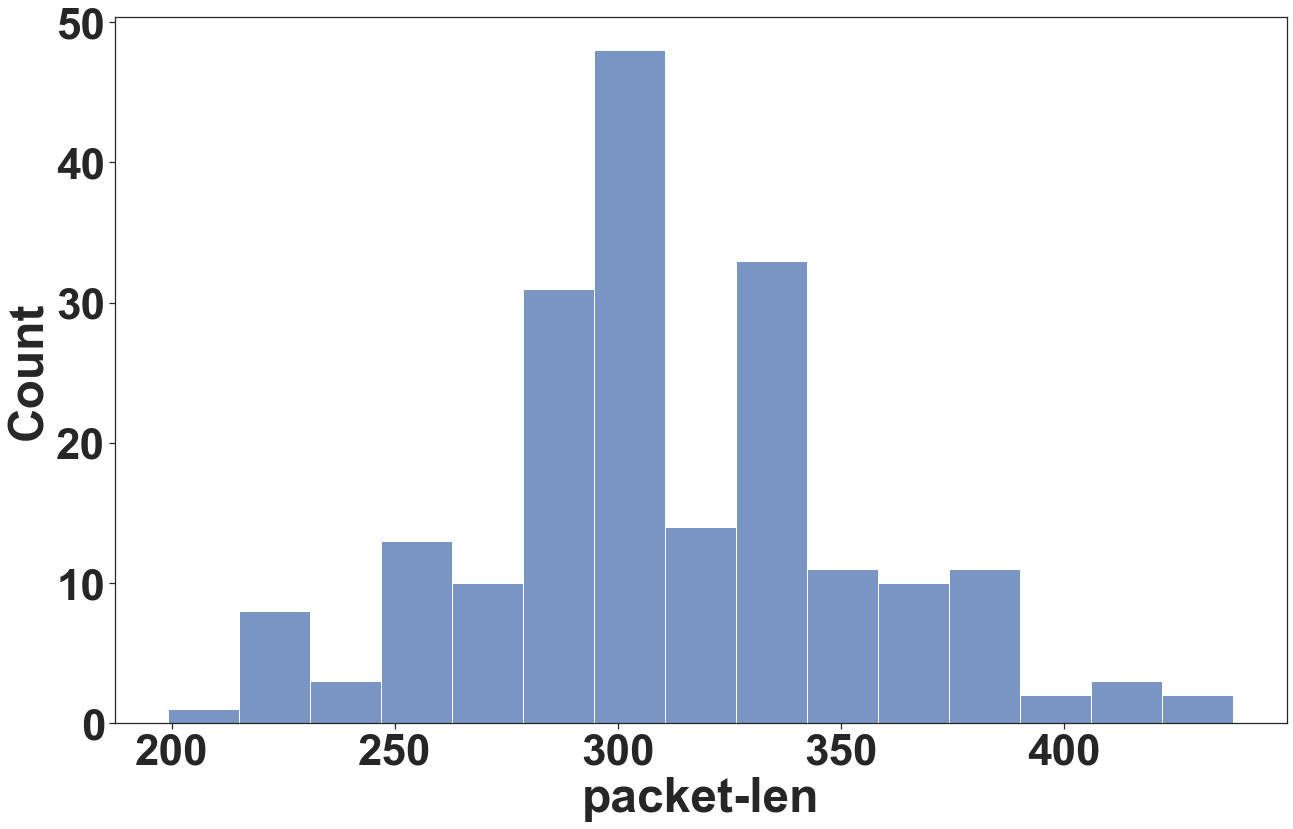

In [159]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 6})
ax = sns.histplot(data= dataset , x = "packet-len")

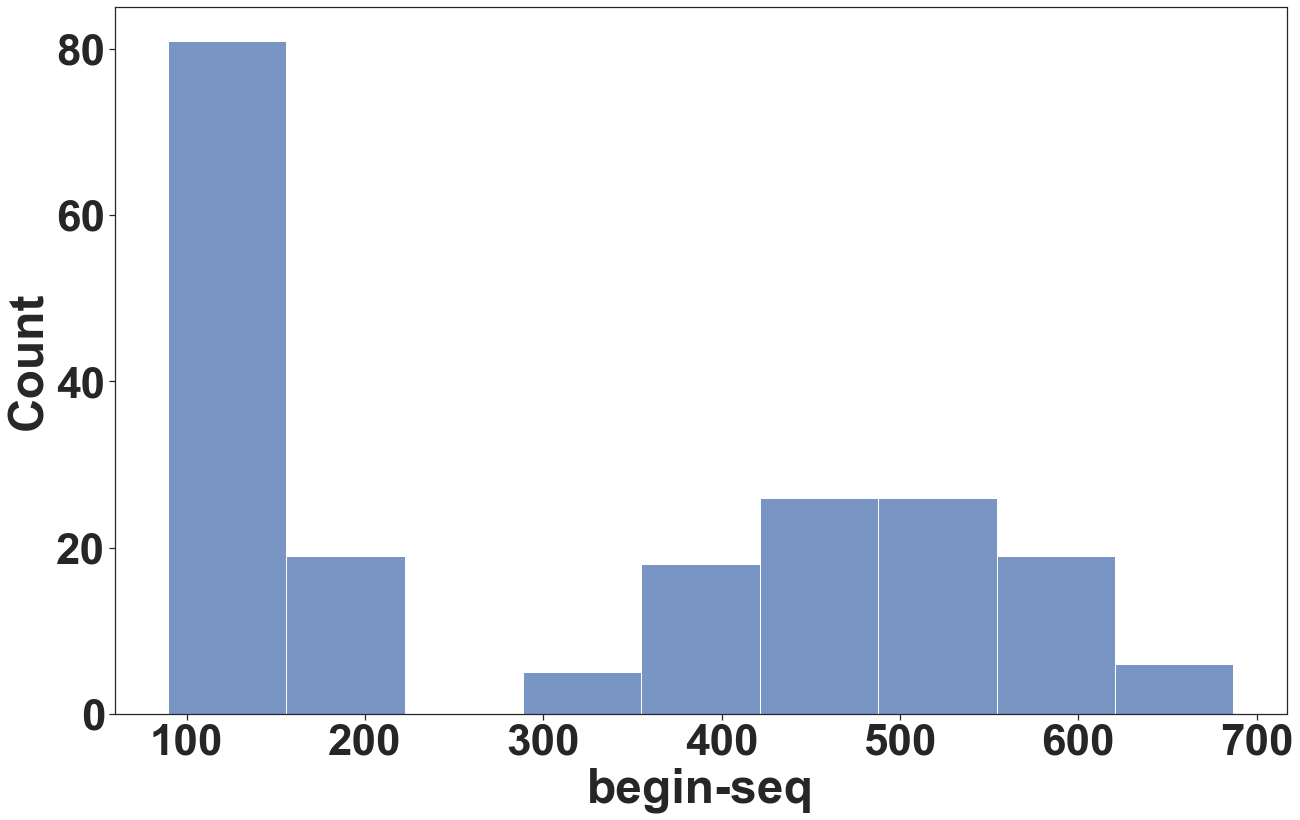

In [160]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth":6})
ax = sns.histplot(data= dataset , x = "begin-seq")

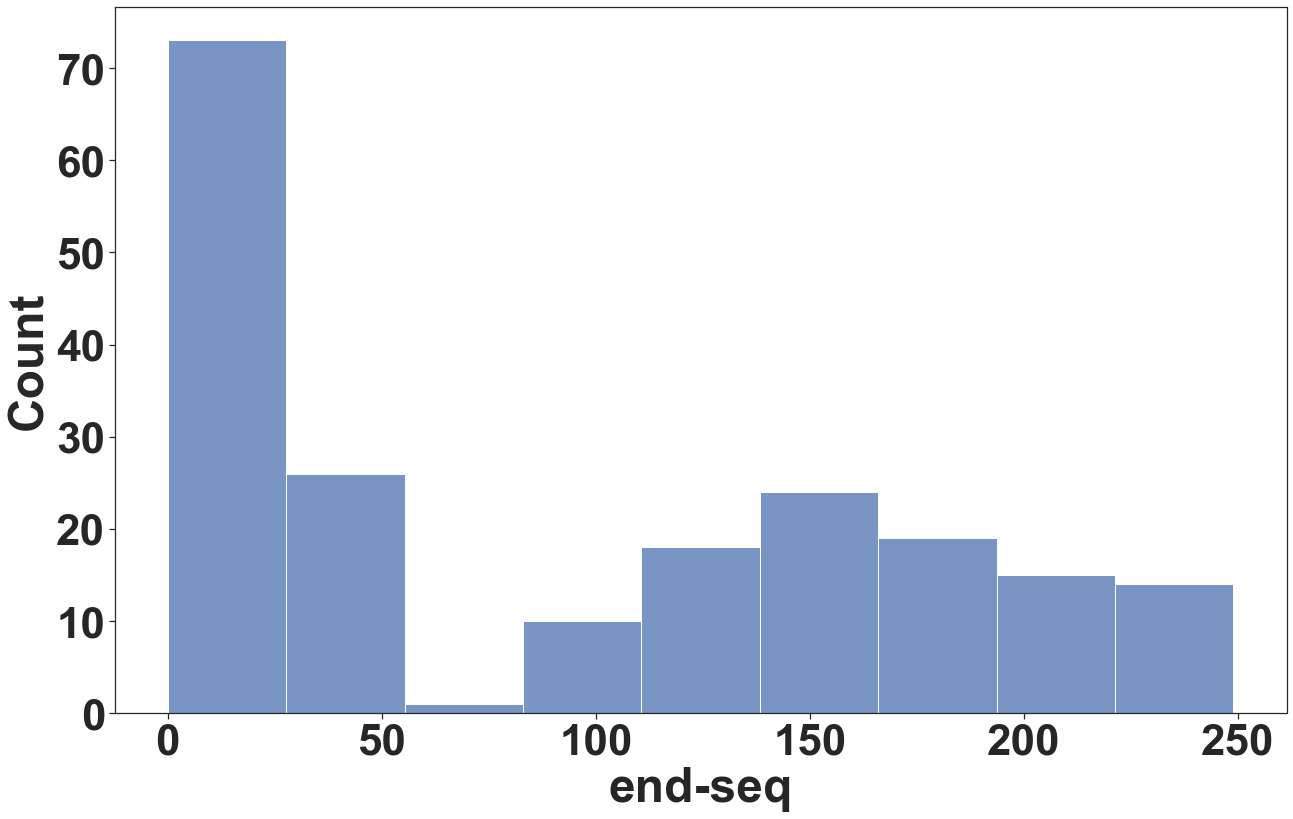

In [161]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 6})
ax = sns.histplot(data= dataset , x = "end-seq")

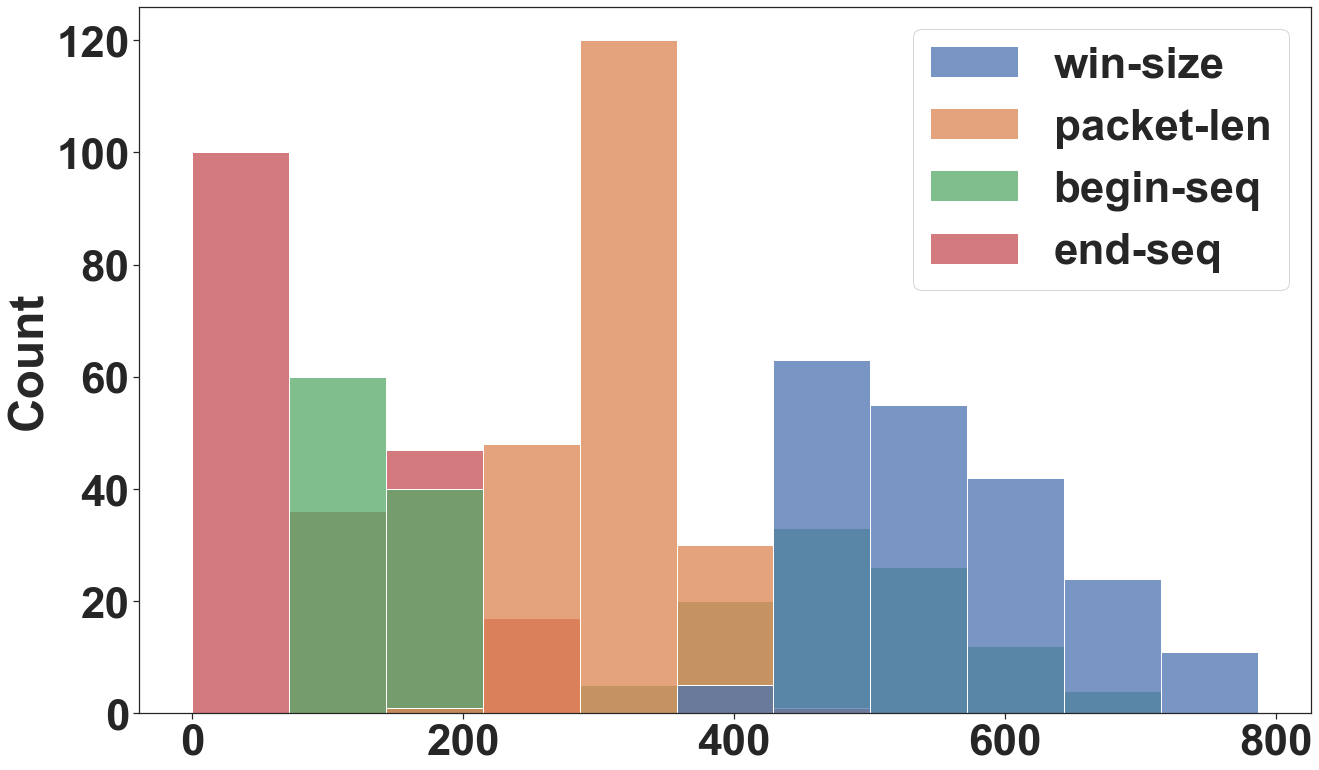

In [162]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 6})
ax = sns.histplot(data= dataset)

In [169]:

fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(20, 13)

# plt.rcParams.update({'font.size': 60})
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# rc('axes', linewidth=3)

# # # Compare Algorithms
plt.rcParams["figure.figsize"] = (60,48)
# # Setting the font scale





<Figure size 1440x936 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

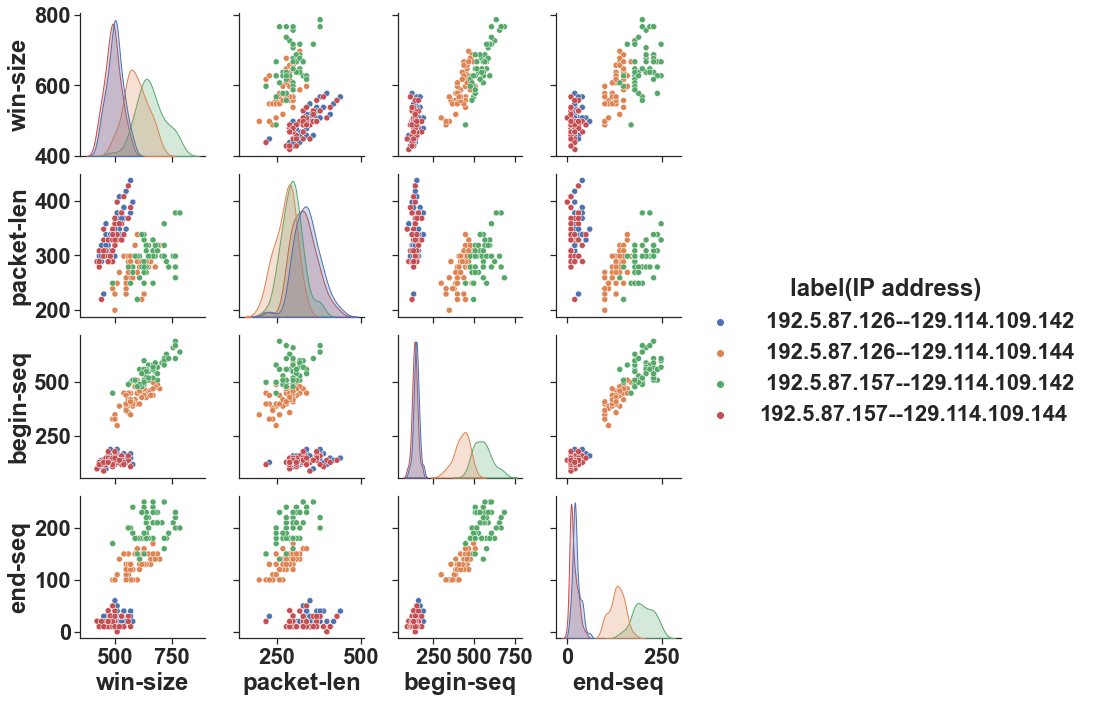

In [171]:

plt.figure(figsize=(40,25))
sns.set(style="ticks",font_scale=2.0, rc={"lines.linewidth": 6})
ax = sns.pairplot(data= dataset,  hue="label(IP address)")

In [242]:

# plt.style.use('ggplot')
# sns.pairplot(data=dataset, hue= 'label(IP address)')

In [115]:
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rc('axes', linewidth=3)

# Compare Algorithms
# plt.rcParams["figure.figsize"] = (31,23)
# plt.scatter_matrix(dataset)
# plt.title('')
# plt.xlabel('Algorithms')
# plt.ylabel('Accuracy')

# plt.show()

In [116]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

<Figure size 1512x936 with 0 Axes>

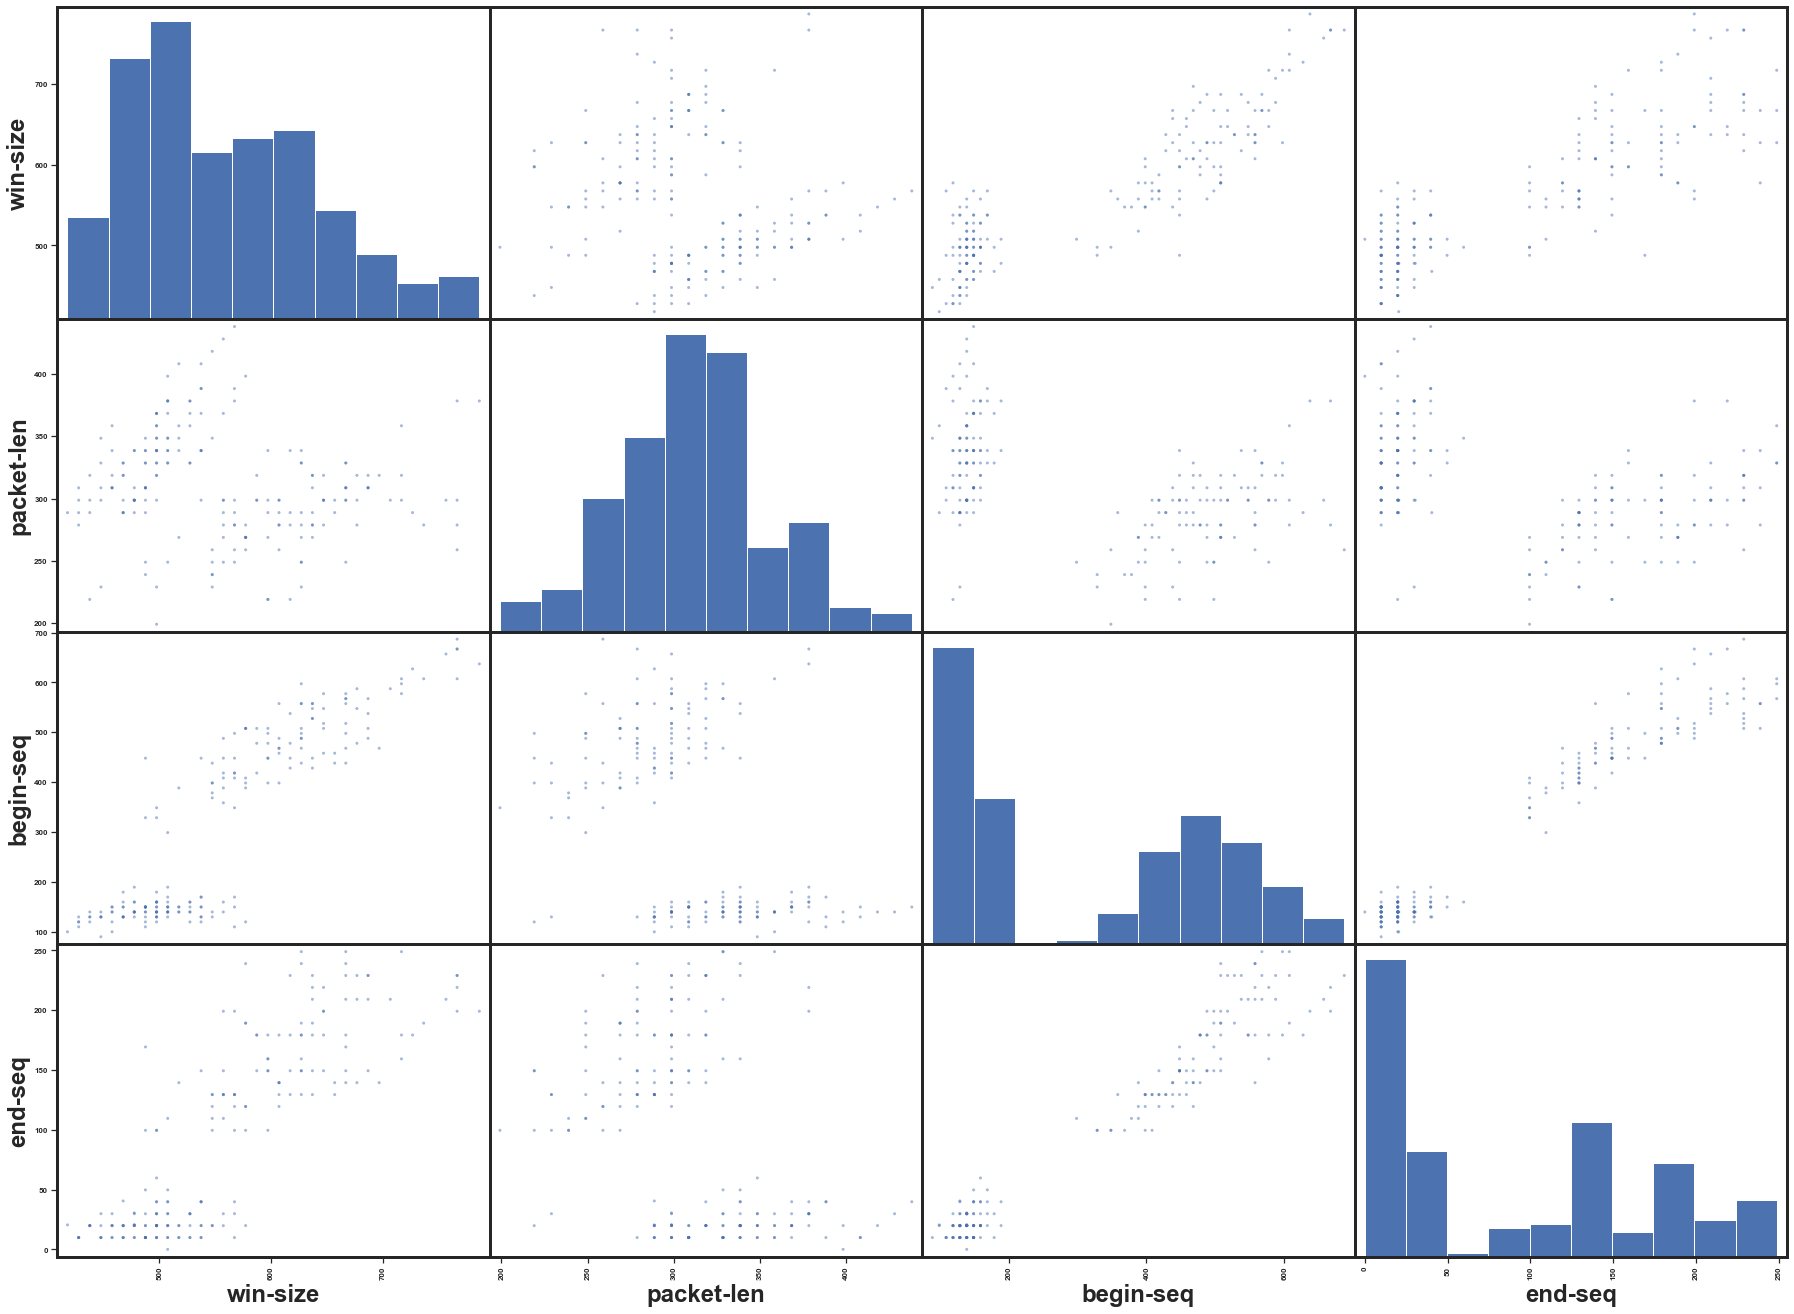

In [117]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()







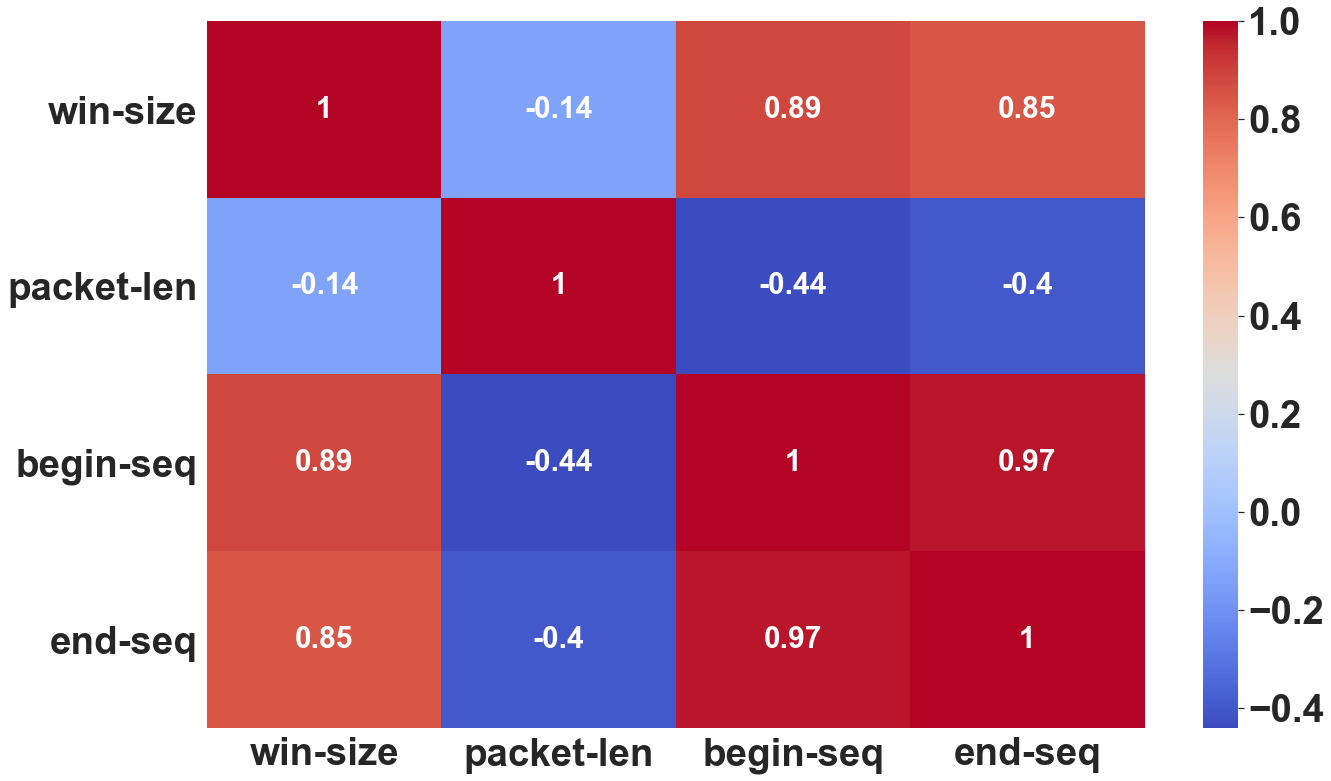

In [244]:
corr = dataset.corr().round(3)
plt.figure(figsize = (21,13))
sns.set(font_scale=3.5)
sns.heatmap(corr,cmap='coolwarm',annot=True, annot_kws={"size":30})
plt.title("", fontsize=70)
plt.savefig('test.png')

Text(0, 0.5, 'Measurements')

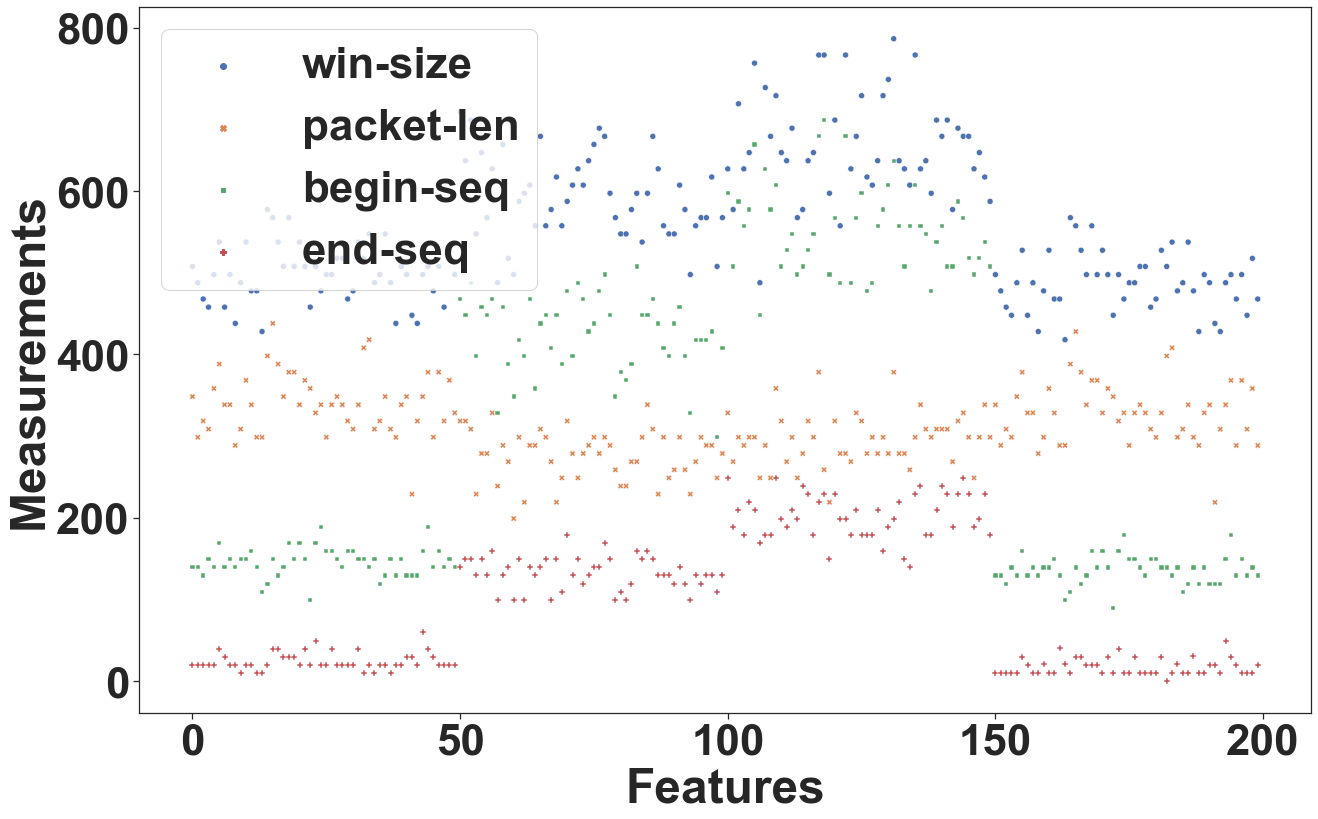

In [206]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 6})
ax = sns.scatterplot(data= dataset)
plt.xlabel('Features')
plt.ylabel('Measurements')

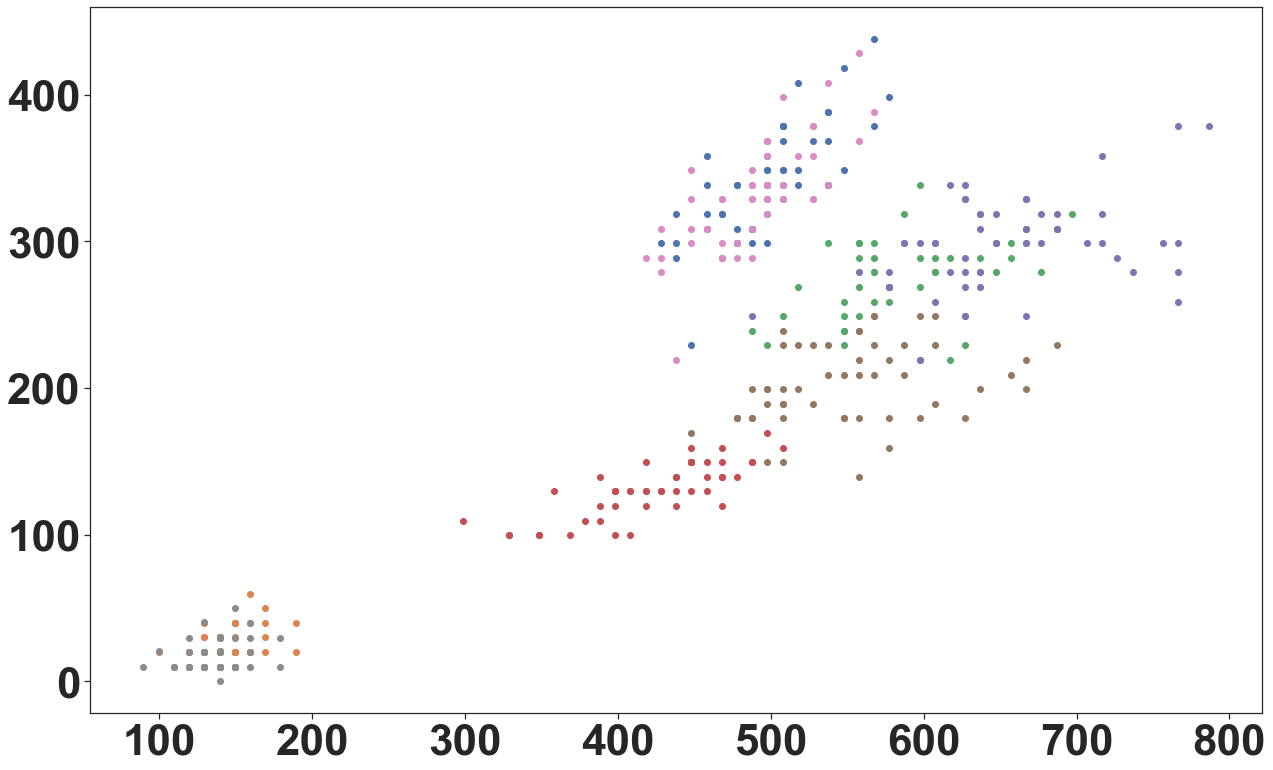

In [207]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(21, 13)

# Setting the font scale
sns.set(style="ticks",font_scale=4, rc={"lines.linewidth": 6})
groups = dataset.groupby("label(IP address)")
for name, group in groups:
    plt.plot(group["win-size"], group["packet-len"], group["begin-seq"],group["end-seq"], marker="o", linestyle="", label=name)
#plt.legend()
                                      
                                      
                                      

In [231]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [232]:

# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier

In [233]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [234]:
# k_range = list(range(1,26))
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, Y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))

In [235]:
# plt.plot(k_range, scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
# plt.show()

In [236]:
...
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('GNB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.778571 (0.067386)
LR: 0.785714 (0.090351)
GNB: 0.814286 (0.085714)
CART: 0.885714 (0.065465)
SVM: 0.307143 (0.045737)
LDA: 0.778571 (0.087190)


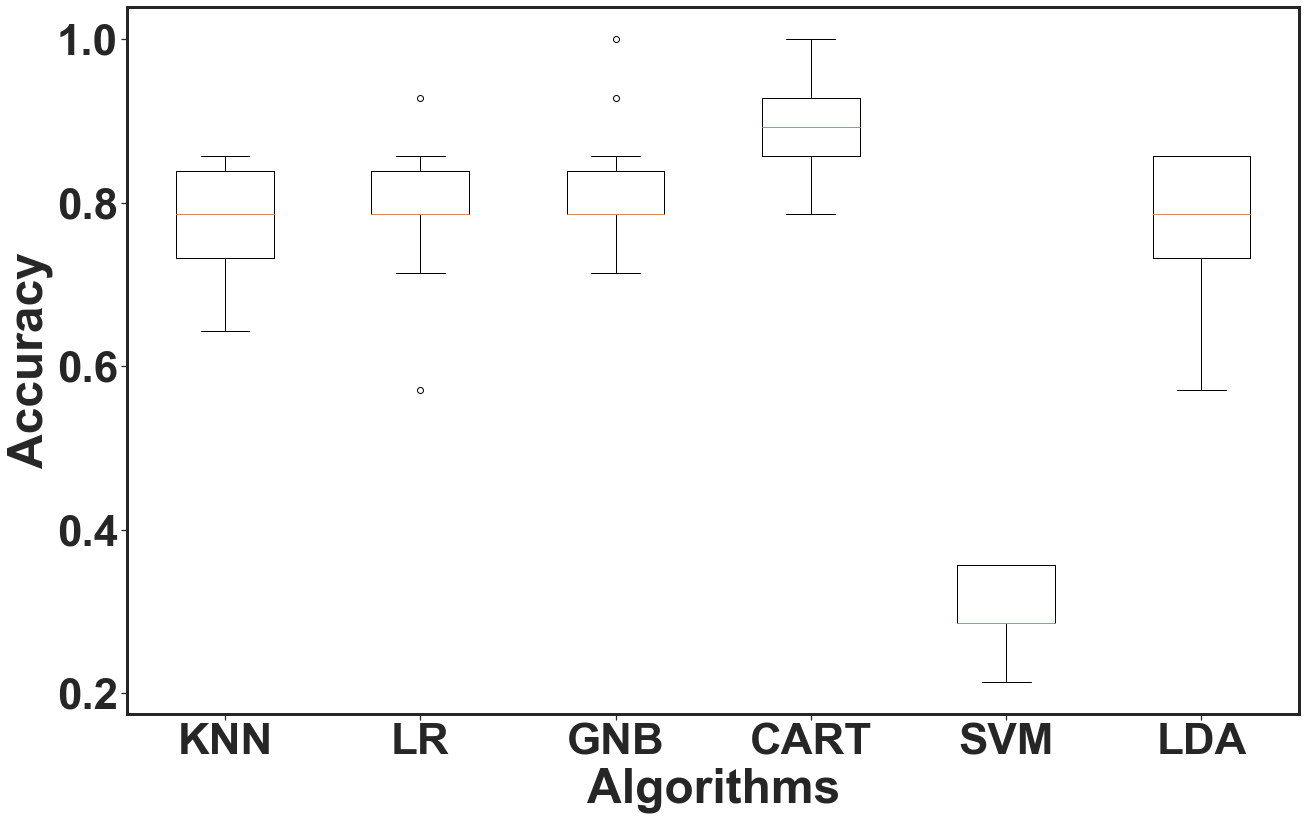

In [237]:


plt.rcParams.update({'font.size': 40})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rc('axes', linewidth=3)

# Compare Algorithms
plt.rcParams["figure.figsize"] = (21,13)
plt.boxplot(results, labels=names)
plt.title('')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

plt.show()

In [238]:
cv_results

array([0.71428571, 0.85714286, 0.57142857, 0.78571429, 0.78571429,
       0.85714286, 0.78571429, 0.71428571, 0.85714286, 0.85714286])

In [239]:
#cv_resultspredictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [240]:
# Evaluate predictions
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[[ 1 17  0  0]
 [ 0 12  0  0]
 [ 0 12  0  0]
 [ 0 17  0  1]]
                                precision    recall  f1-score   support

 192.5.87.126--129.114.109.142       1.00      0.06      0.11        18
 192.5.87.126--129.114.109.144       0.21      1.00      0.34        12
 192.5.87.157--129.114.109.142       0.00      0.00      0.00        12
 192.5.87.157--129.114.109.144       1.00      0.06      0.11        18

                      accuracy                           0.23        60
                     macro avg       0.55      0.28      0.14        60
                  weighted avg       0.64      0.23      0.13        60



/Users/bashirm/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bashirm/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bashirm/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
